## Please describe your task under this cell.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

energydata = pd.read_csv("./Corporate_Energy_Consumption.csv", thousands=',')

display(energydata)

def func(x):
    if(x['Unit'] == 'kWh'):
        x['Total Consumption'] = pd.to_numeric(x['Total Consumption'])*0.0036
        return x
    else:
        return x
    

energydata = energydata.apply(lambda x: func(x), axis=1)
newData = energydata.groupby(['Energy Description', 'Year']).sum()
display(newData)


disEnergyData = newData.loc['District Energy']
electricityData = newData.loc['Electricity']
ngData = newData.loc['Natural Gas']
seData = newData.loc['Solar Power']
stData = newData.loc['Solar Thermal']

fig = plt.figure()
fig.set_size_inches(15,6)

disEnergyData.plot(kind='line', color='b', grid=True)
electricityData.plot(kind='line', color='r', grid=True)
ngData.plot(kind='line', color='g', grid=True)
seData.plot(kind='line', color='y', grid=True)
stData.plot(kind='line', color='m', grid=True)

plt.show()

===== Non Renewable Energy (Electricity & Natural Gas) ========


,Total Consumption
Year,
2014,3.583436e+06
2015,3.364074e+06
2016,3.294217e+06
2017,3.416959e+06
2018,3.618689e+06
2019,3.629713e+06
2020,3.407248e+06
2021,1.987246e+06


===== Renewable Energy (Solar Power & Solar Thermal)  ========


,Total Consumption
Year,
2014,2059.1508
2015,2137.5248
2016,1743.1540
2017,5094.7528
2018,10884.8364
2019,11766.6296
2020,20505.6720
2021,10937.8764


<Figure size 1080x432 with 0 Axes>

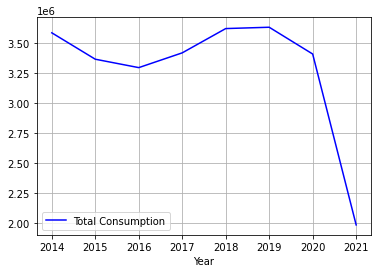

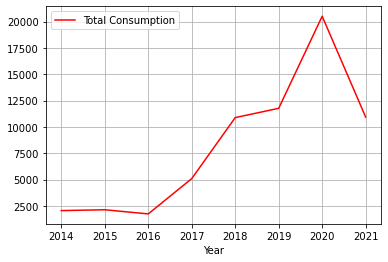

In [93]:

non_renewable_energy= energydata[(energydata['Energy Description'] == 'Electricity') | (energydata['Energy Description'] == 'Natural Gas')].groupby(['Year']).sum()
renewable_energy= energydata[(energydata['Energy Description'] == 'Solar Power') | (energydata['Energy Description'] == 'Solar Thermal')].groupby(['Year']).sum()

print("===== Non Renewable Energy (Electricity & Natural Gas) ========")
display(non_renewable_energy)
print("===== Renewable Energy (Solar Power & Solar Thermal)  ========")
display(renewable_energy)

fig = plt.figure()
fig.set_size_inches(15,6)

non_renewable_energy.plot(kind='line', color='b', grid=True)
renewable_energy.plot(kind='line', color='r', grid=True)

## Please describe your task under this cell.

In [220]:
weatherdata = pd.read_csv("weatherstats_calgary_daily.csv", thousands=',')
display(weatherdata)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2021-10-10,13.9,5.80,7.40,0.9,NaN,NaN,91.0,60.0,65.0,...,NaN,NaN,8.0,5.2,4.0,0.0,NaN,NaN,NaN,NaN
1,2021-10-09,17.6,8.51,7.75,-2.1,NaN,-6.0,56.0,35.9,38.5,...,NaN,NaN,8.0,3.5,4.0,0.0,NaN,NaN,NaN,NaN
2,2021-10-08,12.5,5.25,4.84,-2.8,NaN,-4.0,59.0,35.0,37.0,...,NaN,NaN,3.0,1.0,1.5,0.0,NaN,NaN,NaN,NaN
3,2021-10-07,13.0,6.14,5.45,-2.1,NaN,-5.0,88.0,50.6,55.5,...,NaN,NaN,6.0,1.7,3.0,0.0,NaN,NaN,NaN,NaN
4,2021-10-06,13.2,5.93,7.69,2.2,NaN,NaN,78.0,62.7,59.5,...,NaN,NaN,8.0,5.1,4.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51140,1881-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51141,1881-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51142,1881-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51143,1881-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Please describe your task

In [221]:
weatherdata.date=pd.to_datetime(weatherdata.date)



<Figure size 1440x432 with 0 Axes>

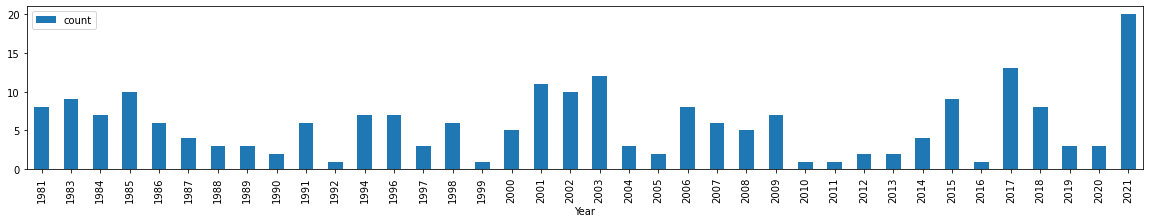

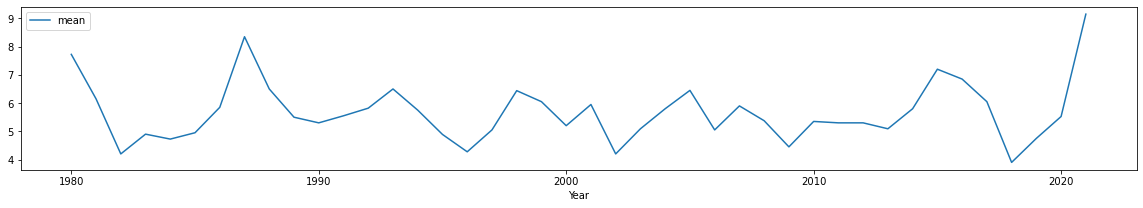

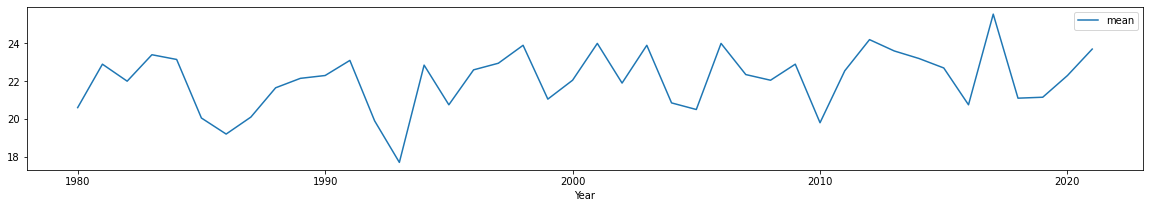

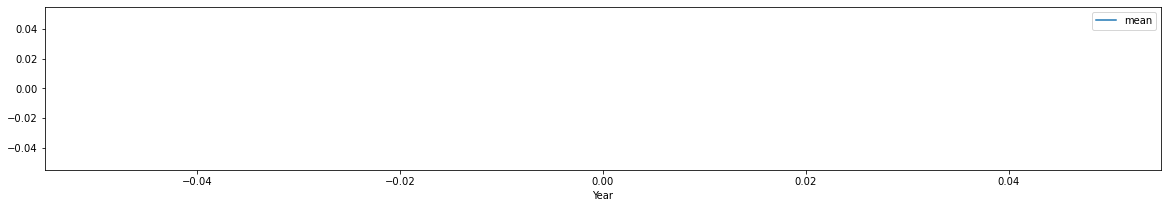

In [276]:
#tempData.head()
yseries = weatherdata['date'].dt.year
mseries = weatherdata['date'].dt.month
dseries = weatherdata['date'].dt.day
tempData = pd.DataFrame({'Date':weatherdata['date'],'Year': yseries,'Month': mseries ,'max_temperature':weatherdata['max_temperature'], 'avg_hourly_temperature':weatherdata['avg_hourly_temperature'], 'avg_temperature':weatherdata['avg_temperature']})
selectedData=tempData[(tempData['max_temperature'] > 30) & (tempData['Year'] >= 1980)]
number_of_hottest_daysInYears=selectedData.groupby(['Year']).agg(count = ('max_temperature','count'))
fig = plt.figure()
fig.set_size_inches(20,6)

number_of_hottest_daysInYears.plot(kind='bar',figsize=(20,3))

meanData=tempData[(tempData['Year'] >= 1980)].groupby(['Year']).agg(mean = ('avg_temperature','median'))
#print(meanData)
meanData.plot(kind='line',figsize=(20,3))

summerData=tempData[(tempData['Year'] >= 1980) & (tempData['Month'] >= 7) & (tempData['Month'] <= 9)]
summerMeanData=summerData.groupby(['Year']).agg(mean = ('max_temperature','median'))
#print(summerMeanData)
summerMeanData.plot(kind='line',figsize=(20,3))

winterData=tempData[(tempData['Year'] >= 1990) & (tempData['Month'] >= 12) & (tempData['Month'] <= 2)]
winterMeanData=winterData.groupby(['Year']).agg(mean = ('max_temperature','mean'))
#print(winterMeanData)
winterMeanData.plot(kind='line',figsize=(20,3))